# Exploring Financial Data using Nasdaq Data Link API

## Table of Contents

- [Introduction](#intro)
- [Request](#req)
- [Data Cleaning](#clean)
- [Understanding the Dataset](#recon)
- [Filtering the DataFrame for Analysis](#filter)
- [Enhancing the DataFrame](#enhance)
- [Understanding Financial Trends Over Time](#trend)
- [Geographical Region Analysis](#geo)
- [Conclusion](#conclude)

# Introduction <a id="intro"></a>

**Brief API description:** The [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/in-depth-usage-1) provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the `MER/F1` data table, which contains detailed financial information such as balance sheets, cash flow statements, and income statements.

We will extract financial data for a specific set of companies, with an emphasis on understanding their financial performance over time. We'll examine metrics like `Accrued Expenses Turnover` and explore how these values differ among companies and regions.

**Our goal:** To perform a detailed analysis of this financial data, including trend analysis and comparative studies. We will use Python for data retrieval, cleaning, and analysis and create visualizations to present our findings effectively.

In [1]:
import config
api_key = config.API_KEY
# importing API key for Nasdaq

Now we wil try to determine the appropriate API endpoint and the parameters needed to query the financial data. You can also see the documentation [Nasdaq Data Link API documentation](https://docs.data.nasdaq.com/docs/in-depth-usage-1)

To explain the composition of a call, we will use the tables dataset Mergent Global Fundamentals Data as an example. See product page at https://data.nasdaq.com/databases/MF1. On the product page, you will see that this product is made up of just one data table called Mergent Global Fundamentals Data with product code MER/F1. This is the code we will use in API calls - for example:

`curl "https://data.nasdaq.com/api/v3/datatables/MER/F1.xml?&mapcode=-5370&compnumber=39102&reporttype=A&qopts.columns=reportdate,amount&api_key=<YOURAPIKEY>"`

## Table MER/F1

In [51]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
# API url in json format
# https://data.nasdaq.com/api/v3/datatables/{publisher}/{table}/metadata
# for parameters

## Parameters

There are four optional parameters that are common to all tables:


- **qopts.columns:**   Request data from specific columns by passing the qopts.columns parameter. If you want to query for multiple columns, include the column names separated by a comma.
- **qopts.export:**    Good for large queries; the data requested will be packaged into a zip file for download.
- **qopts.per_page:**    The number of results per page that can be returned, to a maximum of 10,000 rows. (Large tables will be displayed over several pages.)
- **qopts.cursor_id:**    Each API call returns a unique cursor ID that identifies the next page of the table. Including the cursor ID in your API call will allow you to page through the table. A null cursor ID means that the current page will be the last page of the table. For more on downloading entire tables, click here.

## Filters

- **=** : Modifies the parameter to return values equal to the requested value
- **.gt=**: Modifies the parameter to return values greater than the requested value
- **.lt=**: Modifies the parameter to return values less than the requested value
- **.gte=**: Modifies the parameter to return values greater than or equal to the requested value
- **.lte=**: Modifies the parameter to return values less than or equal to the requested value

# Request <a id="req"></a>

In [4]:
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10
}

response = requests.get(api_url, params=parameters)
json_data = response.json()
# converting into json data
json_data

{'datatable': {'data': [[2438,
    1868192544,
    -1802,
    10.481948,
    '2011-06-30',
    'Q2',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived'],
   [2438,
    1868216112,
    -1802,
    8.161754,
    '2011-09-30',
    'Q3',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived']

# Data Cleaning <a id="clean"></a>

We have a datatable key dicationary, which contains another dictionary. Only looking at the Json data is rather challenging and hard to analyze. We will be converting them into python pandas dataframe.

In [5]:
# updating parameters dictionary to return 10,000 rows.
parameters['qopts.per_page'] = 10000
response = requests.get(api_url, params= parameters)
json_data = response.json()

data = json_data['datatable']['data']
# cleaning the dictionary only including all the data, that is under single data key value

columns = json_data['datatable']['columns']
columns = [col['name'] for col in columns]
# column, have name, and data type keys with values, we only need column names
# cleaning for getting only column names that is what we need

df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()


,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


# Understanding the Dataset<a id="recon"></a>

In [6]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [7]:
df_metric.shape

(10000, 32)

In [8]:
df_metric.describe()

,compnumber,reportid,mapcode,amount,cik
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04
mean,68545.145900,1.644319e+09,-3669.044500,5.018704e+12,8.698509e+05
std,51580.054062,1.475896e+08,2101.671747,6.966402e+13,5.524387e+05
min,1409.000000,1.504051e+09,-9087.000000,-3.320227e+12,1.698800e+04
25%,12161.000000,1.543963e+09,-4524.000000,2.778785e+00,3.201930e+05
50%,99247.000000,1.581777e+09,-4023.000000,3.342475e+01,1.062781e+06
75%,111113.000000,1.623721e+09,-1766.000000,1.061628e+09,1.467373e+06
max,133772.000000,1.952498e+09,-873.000000,9.876500e+14,1.668717e+06


## Key columns we need to see

| Column Name   | Description                                                      |
|---------------|------------------------------------------------------------------|
| compnumber    | Unique identifier for each company                               |
| reportid      | ID associated with a specific financial report                   |
| mapcode       | Code representing a specific financial metric or data point     |
| amount        | Numerical value of the financial metric                          |
| reportdate    | Date of the financial report                                     |
| reporttype    | Type of the report (e.g., Q1, Q2)                                |
| currency      | Currency in which financial amounts are reported                 |
| longname      | The name of the bank or company                                  |
| city          | The city to which a given bank or company belongs                |
| country       | Region to which a given bank or company is situated              |
| indicator     | Specific financial indicator being reported                      |
| statement     | Type of financial statement from which the data is derived      |


# Filtering the DataFrame for Analysis <a id="filter"></a>

In [9]:
necessary_columns=['longname', 'country', 'indicator', 'region', 'reportdate','reporttype','amount']
# necessary columns to analyze the data as per our interest

In [10]:
df_metric[necessary_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longname    10000 non-null  object 
 1   country     10000 non-null  object 
 2   indicator   10000 non-null  object 
 3   region      10000 non-null  object 
 4   reportdate  10000 non-null  object 
 5   reporttype  10000 non-null  object 
 6   amount      10000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


These columns are crucial for our analysis, as they help us analyze financial trends and make regional comparisons. Now we look into `accrued expenses turnover` financial metric to filter the data, which is what we need for our analysis.

In [11]:
df_metric = df_metric[necessary_columns]
# only keeping necessary columns

filtered_df = df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']
# we then filter with only the indicator we need for our analysis

filtered_df.head()

,longname,country,indicator,region,reportdate,reporttype,amount
0,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Europe,2011-06-30,Q2,10.481948
1,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Europe,2011-09-30,Q3,8.161754
2,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Europe,2012-06-30,Q2,10.788213
3,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Europe,2012-09-30,Q3,9.437545
4,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Europe,2013-06-30,Q2,8.755041


In [12]:
filtered_df.describe()
# to inspect statistical variations

,amount
count,139.000000
mean,26.908762
std,33.097291
min,4.689773
25%,9.675670
50%,13.753753
75%,31.777614
max,229.810427


It seems the turnover is not that consistent over time, as the data amount is varied and, there is a huge gap between minimul accrued expense and the maximum accrued expense. But, it is justifyable over the course of time for such difference to be noticed.

# Enhancing the DataFrame <a id="enhance"></a>

For a clear analysis and reporting, we will try to enhance the readability and information quality of our DataFrame. We will add column with full country names and clean up the column names.

In [13]:
filtered_df['country'].value_counts()

country
USA    31
JPN    27
CYM    27
IRL    25
BHS    19
DEU     6
GBR     4
Name: count, dtype: int64

In [14]:
country_mapping = {
    'USA': 'United States of America',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'IRL': 'Ireland',
    'BHS': 'Bahamas',
    'DEU': 'Germany',
    'GBR': 'United Kingdom'
}
# country code mapping with full name

def country_name(code):
    return country_mapping[code]
# returns value for the code 'key'

# filtered_df.loc[:,'country']
filtered_df.loc[:,'country_name'] = filtered_df.loc[:,'country'].apply(country_name)

/tmp/ipykernel_41/2380641982.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'country_name'] = filtered_df.loc[:,'country'].apply(country_name)


In [15]:
filtered_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
United Kingdom               4
Name: count, dtype: int64

In [16]:
filtered_df.columns

Index(['longname', 'country', 'indicator', 'region', 'reportdate',
       'reporttype', 'amount', 'country_name'],
      dtype='object')

In [17]:
mapper = {
    'reportdate': 'report_date',
    'reporttype': 'report_type',
    'longname': 'company_name'
}

filtered_df = filtered_df.rename(columns=mapper)
updated_df = filtered_df

In [18]:
updated_df.columns

Index(['company_name', 'country', 'indicator', 'region', 'report_date',
       'report_type', 'amount', 'country_name'],
      dtype='object')

In [19]:
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
United Kingdom               4
Name: count, dtype: int64

# Understanding Financial Trends Over Time <a id="trend"></a>

This is a vital process for a sound business analysis and decision-making. We will concentrate on extracting relevant data for a specific time period(2010-2015) and visualize the trends.

In [20]:
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
# converted into datetime
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 9386
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  139 non-null    object        
 1   country       139 non-null    object        
 2   indicator     139 non-null    object        
 3   region        139 non-null    object        
 4   report_date   139 non-null    datetime64[ns]
 5   report_type   139 non-null    object        
 6   amount        139 non-null    float64       
 7   country_name  139 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 9.8+ KB


In [21]:
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]
# data only including 2010 to 2015
updated_df['report_date'].dt.year.value_counts(ascending=True)

report_date
2010     7
2014    22
2015    25
2011    28
2012    28
2013    29
Name: count, dtype: int64

In [22]:
# selecting only relevant columns

relevant_data = updated_df[['company_name', 'report_date', 'amount']]

In [23]:
relevant_data['company_name'].value_counts()

company_name
Canon Inc                    27
Herbalife Ltd (New)          27
Apple Inc                    25
Accenture plc                25
Ultrapetrol (Bahamas) Ltd    19
Deutsche Bank AG              6
Nielsen Holdings PLC          6
Capri Holdings Ltd            4
Name: count, dtype: int64

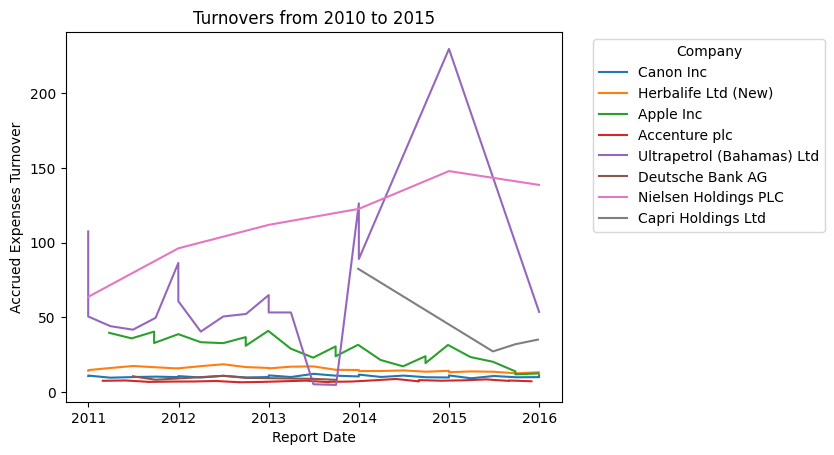

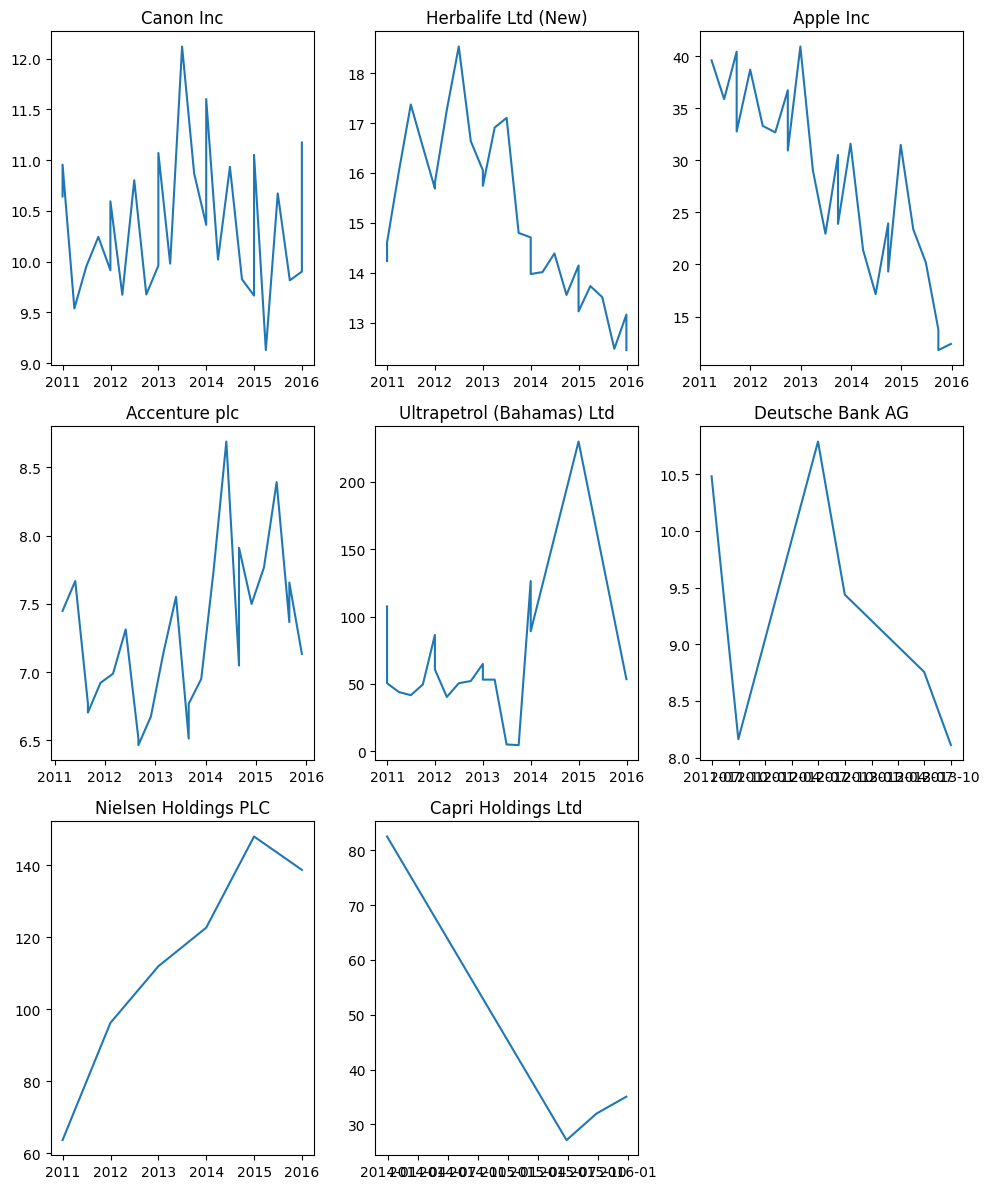

In [44]:
companies = [
    "Canon Inc",
    "Herbalife Ltd (New)",
    "Apple Inc",
    "Accenture plc",
    "Ultrapetrol (Bahamas) Ltd",
    "Deutsche Bank AG",
    "Nielsen Holdings PLC",
    "Capri Holdings Ltd"
]
# unique company names

count = 1

for company in companies:
    company_data = relevant_data[relevant_data['company_name'] == company]
    
    plt.plot(company_data['report_date'], company_data['amount'], label=company)
    plt.xlabel('Report Date')
    plt.ylabel('Accrued Expenses Turnover')
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Turnovers from 2010 to 2015')

plt.figure(figsize=(10,12))    
for company in companies:
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.subplot(3, 3, count)
    plt.plot(company_data['report_date'], company_data['amount'], label=company)
    count+=1
    plt.tight_layout() 
    plt.title(company)

The turnover increases in increasing order for `Nielsen Holdings PLC`. The turnover expenses are more varied for `Ultrapetrol (Bahamas) Ltd`. 
For `Canon Inc`, `Herbalife Ltd (New)`, `Deutsche Bank AG`, and `Accenture plc`, the turnovers are rather stable. `Apple Inc` has decreasing turnovers.

# Geographical Region Analysis <a id="geo"></a>

Now we analyze by grouping data by country. We will try to find out average financial amount for having deep understanding of regional performance, higlighting disparities and trends across different markets. It will offer insights into each region's economic impact and guiding strategic business decisions adn resource allocation based on regional strenghts adn weaknesses.

In [46]:
country_avg = updated_df.groupby('country_name')['amount'].mean()
country_avg
# each country average turn overs

country_name
Bahamas                     66.515369
Cayman Islands              15.060796
Germany                      9.288999
Ireland                      7.264400
Japan                       10.376605
United Kingdom              44.166750
United States of America    44.377585
Name: amount, dtype: float64

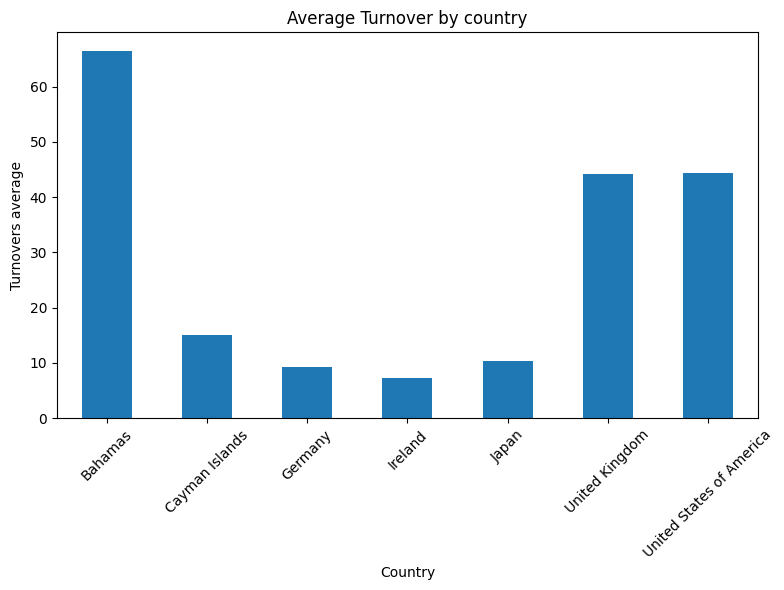

In [50]:
plt.figure(figsize=(8,6))
country_avg.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Turnovers average')
plt.title('Average Turnover by country')
plt.xticks(rotation=45)
plt.tight_layout()

# Conclusion <a id="conclude"></a>

Highest expenses is made by `Bahamas`, while, the lowest by `Ireland` and `Germany`. `United Kingdom` and `United States of America` have same level of turnover